In [ ]:
看涨期权是这样一种合约：它给合约持有者（即买方）按照约定的价格从对手手中购买特定数量之特定交易标的物的权利。
买入看涨期权(long call)：有权利以某种价格买入标的物
卖出看涨期权(short call)：有义务以某种价格卖出标的物
看跌期权指期权买方按照一定的价格，在规定的期限内享有向期权卖方出售商品或期货的权利，但不负担必须卖出的义务。
买入看跌期权(long put)：有权利以某种价格卖出标的物
卖出看跌期权(short put)：有义务以某种价格买入标的物
https://zhuanlan.zhihu.com/p/211166108

In [ ]:
【案例分析1】假定A投资者买入100股W股票的执行价格为50元/股的欧式看涨期权。
假定W股票当前的价格为46元/股，期权到期为4个月后，购买1股W股票的期权价格
（期权费）是6元，投资者最初投资为（100×6），也就是一份看涨期权费为600元。


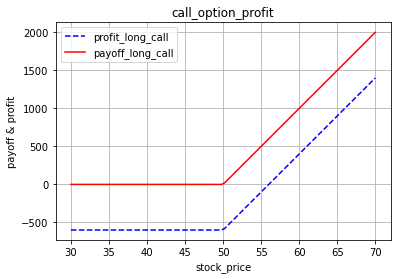

In [11]:
#看涨期权多头
import numpy as np
import matplotlib.pyplot as plt
K=50#期权执行价格
C=6#每股期权费
S0=np.linspace(30,70,100)
plt.title('call_option_profit')
plt.xlabel('stock_price')
plt.ylabel('payoff & profit')
plt.plot(S0,100*np.maximum(S0-K-C,-C),'b--',label='profit_long_call')#盈亏
plt.plot(S0,100*np.maximum(S0-K,0),'r-',label='payoff_long_call')#收益
plt.grid()
plt.legend()
#欧式看涨期权的多头的盈亏是：Max(ST-K-C,-C)




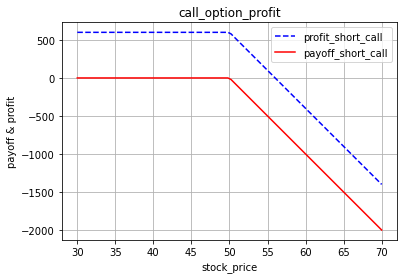

In [19]:
#看涨期权空头
import numpy as np
import matplotlib.pyplot as plt
K=50#期权执行价格
C=6#每股期权费
S0=np.linspace(30,70,100)
plt.title('call_option_profit')
plt.xlabel('stock_price')
plt.ylabel('payoff & profit')
plt.plot(S0,-100*np.maximum(S0-K-C,-C),'b--',label='profit_short_call')#盈亏
plt.plot(S0,-100*np.maximum(S0-K,0),'r-',label='payoff_short_call')#收益
plt.grid()
plt.legend()
#欧式看涨期权空头的盈亏是：-Max(ST-K-C,-C) 即多头盈亏的相反数（零和游戏）


In [ ]:
【案例分析2】假定B投资者买入100股Y股票的执行价格为70元/股的欧式看跌期权。
假定Y股票当前的价格为75元/股，期权到期为3个月后，1股W股票的看跌期权价格
（期权费）是7元，投资者B最初投资为（100×7），也就是一份看跌期权费为700元。
https://zhuanlan.zhihu.com/p/211166108

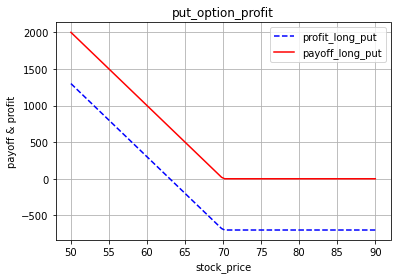

In [17]:
#看跌期权多头
K = 70
P = 7
import numpy as np
import matplotlib.pyplot as plt
S0=np.linspace(50,90,100)
plt.title('put_option_profit')
plt.xlabel('stock_price')
plt.ylabel('payoff & profit')
plt.plot(S0,100*np.maximum(K-S0-P,-P),'b--',label='profit_long_put')#盈亏
plt.plot(S0,100*np.maximum(K-S0,0),'r-',label='payoff_long_put')#收益
plt.grid()
plt.legend()

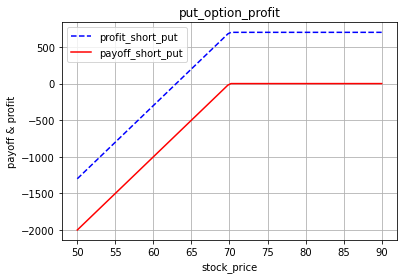

In [18]:
#看跌期权空头
K = 70
P = 7
import numpy as np
import matplotlib.pyplot as plt
S0=np.linspace(50,90,100)
plt.title('put_option_profit')
plt.xlabel('stock_price')
plt.ylabel('payoff & profit')
plt.plot(S0,-100*np.maximum(K-S0-P,-P),'b--',label='profit_short_put')#盈亏
plt.plot(S0,-100*np.maximum(K-S0,0),'r-',label='payoff_short_put')#收益
plt.grid()
plt.legend()

In [ ]:
期权买卖的平价关系式与无风险套利：
组合A：一份欧式看涨期权C + 一份K*exp(-rt)的现金
组合B：一份欧式看跌期权 + 一份标的资产(股票的现值)
对于组合A：当到期ST>K(股票的到期价格大于现金K)时，以手中的K去买标的资产
(行权)，价值为ST；当到期ST<K时，放弃行权，价值为K
对于组合B：当到期ST>K时，放弃行权(以K卖出的权利)，价值为ST；到期ST<K时行权
(以K卖出有利可图)卖掉标的资产后手中价值为K
因此两个组合到期时的价值均为Max(ST,K)，那么现值也相等，即平价关系式。
https://zhuanlan.zhihu.com/p/211166108

In [1]:
#期权买卖权平价公式
def call_parity(p,S,K,r,T):
    '''通过看跌-看涨平价关系式计算欧式看涨期权价格
    p：欧式看跌期权的价格；
    S：期权基础资产的价格；
    K：期权的执行价格；
    r：代表无风险收益率；
    T：代表期权合约的剩余期限。'''
    import numpy as np
    return p+S-K*np.exp(-r*T)

def put_parity(c,S,K,r,T):
    '''通过看跌-看涨平价关系式计算欧式看涨期权价格
    c：欧式看涨期权的价格；
    S：期权基础资产的价格；
    K：期权的执行价格；
    r：代表无风险收益率；
    T：代表期权合约的剩余期限。'''
    import numpy as np
    return c+K*np.exp(-r*T)-S

call=call_parity(p=0.3,S=22,K=20,r=0.03,T=0.25) #计算看涨期权价格
put=put_parity(c=2.3,S=22,K=20,r=0.03,T=0.25)  #计算看跌期权的价格
print('通过平价关系式得到看涨期权价格',round(call,4))
print('通过平价关系式得到看跌期权价格',round(put,4))

通过平价关系式得到看涨期权价格 2.4494
通过平价关系式得到看跌期权价格 0.1506
